# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
import requests
from citipy import citipy

# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

api_key = "53936d68d19b3f979a5386b70910c08f"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = f"{url}?q={city}&appid={api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | atafu village
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | vrchlabi
Processing Record 7 of Set 1 | senatobia
Processing Record 8 of Set 1 | khandyga
Processing Record 9 of Set 1 | udachny
Processing Record 10 of Set 1 | dangriga
Processing Record 11 of Set 1 | sumbawanga
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | haiku-pauwela
Processing Record 14 of Set 1 | lethem
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | tarija
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | nabire
Processing Record 19 of Set 1 | unai
Processing Record 20 of Set 1 | belmonte
Processing Record 21 of Set 1 | constantia
Processing Record 22 of Set 1

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,3.17,94,100,2.11,GS,1702511552
1,atafu village,-8.5421,-172.5159,26.73,88,100,7.37,TK,1702511553
2,port alfred,-33.5906,26.8910,19.70,90,45,7.25,ZA,1702511553
3,edinburgh of the seven seas,-37.0676,-12.3116,15.36,89,100,6.11,SH,1702511553
4,yellowknife,62.4560,-114.3525,3.01,95,75,4.63,CA,1702511554


In [24]:
import os
# Export the City_Data into a csv
output_folder = "output_data"

os.makedirs(output_folder, exist_ok=True)

output_csv_file = os.path.join(output_folder, "city_data.csv")
city_data_df.to_csv(output_csv_file, index=False)

In [36]:
# Read saved data
loaded_data_df = pd.read_csv('city_weather.csv')
# Display sample data
loaded_data_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'city_weather.csv'

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

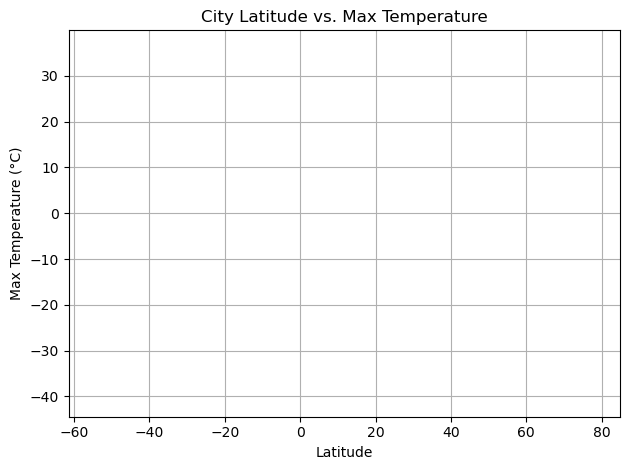

In [37]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="blue", alpha=0)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

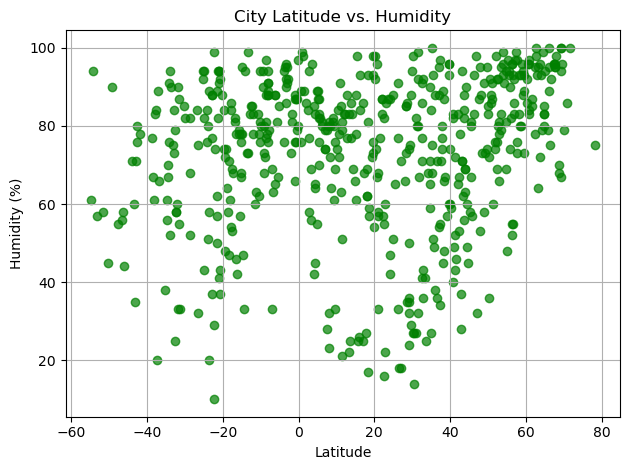

In [38]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="green", alpha=0.7)


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

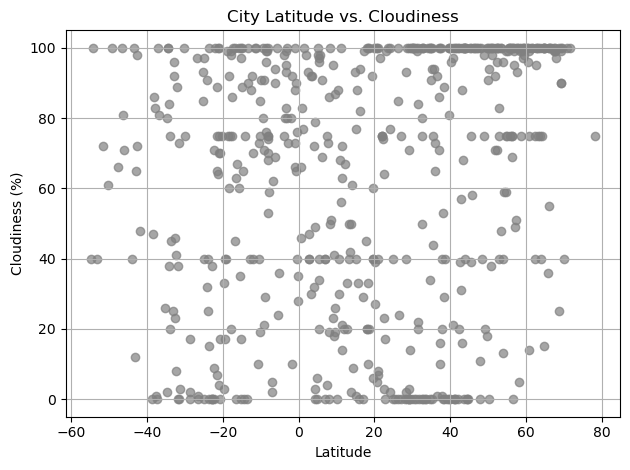

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color="gray", alpha=0.7)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

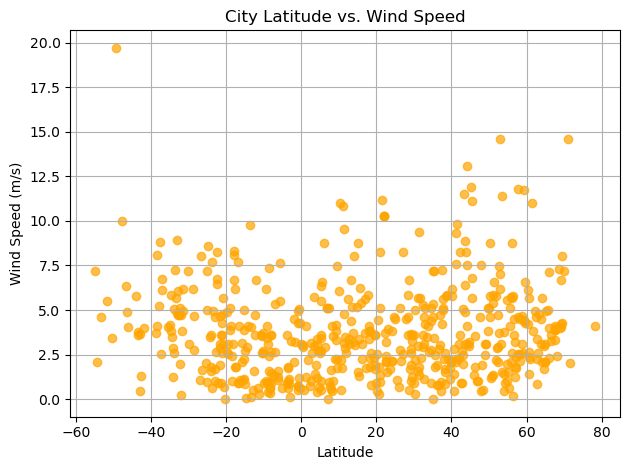

In [40]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="orange", alpha=0.7)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,yellowknife,62.4560,-114.3525,3.01,95,75,4.63,CA,1702511554
5,vrchlabi,50.6270,15.6094,5.44,92,100,1.16,CZ,1702511554
6,senatobia,34.6176,-89.9687,11.23,59,100,2.76,US,1702511554
7,khandyga,62.6667,135.6000,-40.62,100,95,0.86,RU,1702511554
8,udachny,66.4167,112.4000,-27.53,75,100,3.62,RU,1702511555


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,3.17,94,100,2.11,GS,1702511552
1,atafu village,-8.5421,-172.5159,26.73,88,100,7.37,TK,1702511553
2,port alfred,-33.5906,26.8910,19.70,90,45,7.25,ZA,1702511553
3,edinburgh of the seven seas,-37.0676,-12.3116,15.36,89,100,6.11,SH,1702511553
10,sumbawanga,-7.9667,31.6167,14.95,91,68,0.90,TZ,1702511556


###  Temperature vs. Latitude Linear Regression Plot

In [48]:
# Linear regression on Northern Hemisphere
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, filename=None):

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

plt.scatter(x_values, y_values, marker='o', color='blue', alpha=0.7, label='Data Points')
plt.plot(x_values, regression_line, color='red', label=f'Linear Regression\ny = {slope:.2f}x + {intercept:.2f}')

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.legend()
    
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r_value_text = f'r = {r_value:.2f}'
print(f"The r-value is: {r_value_text}")
    

IndentationError: expected an indented block after function definition on line 2 (1019291643.py, line 4)

The r-value is: 0.4121057168607245


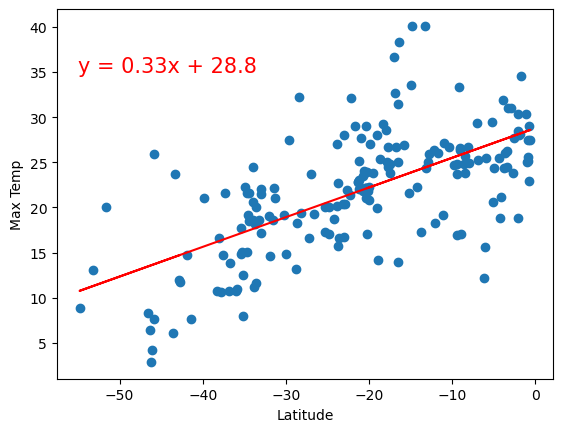

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


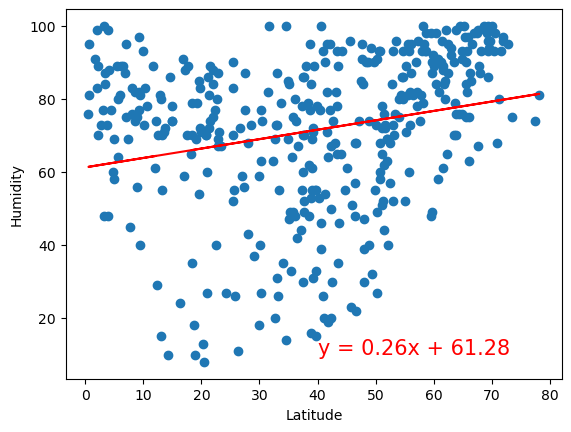

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


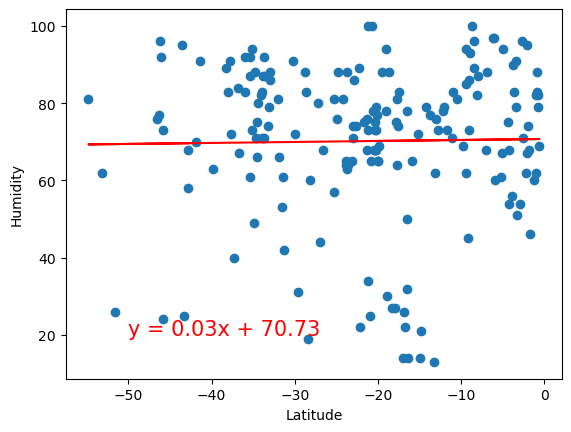

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


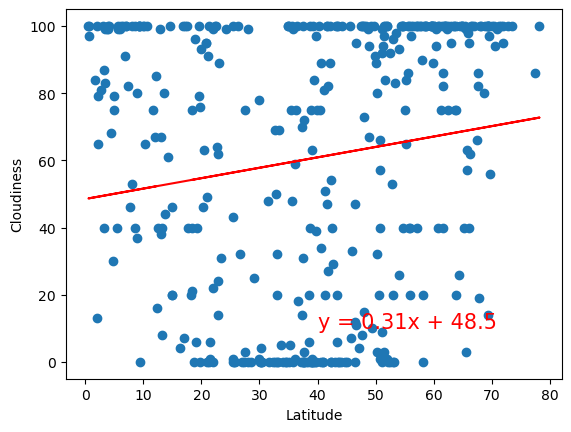

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


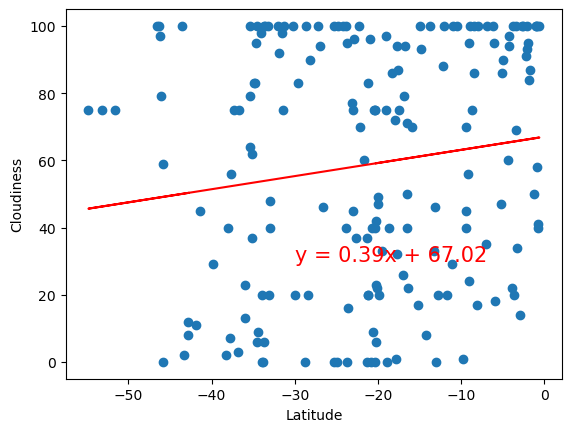

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


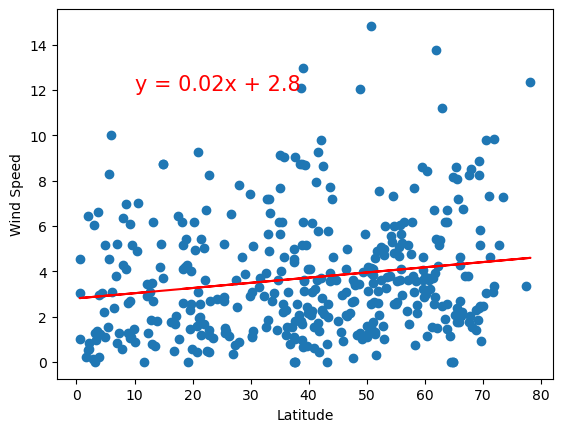

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


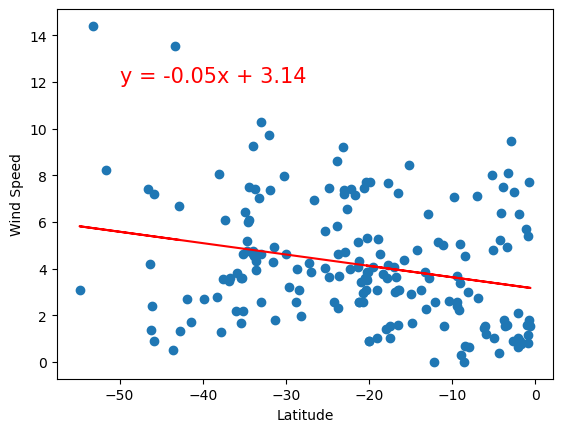

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE